# **Web Scraping – Extraction des salaires par langage de programmation**


## Objectif


Dans cette section, l’objectif est d’extraire automatiquement des informations à partir d’une page web statique, puis de les structurer pour analyse.

Les données que nous allons collecter :

* Nom du langage de programmation
* Salaire annuel moyen associé

Les résultats seront sauvegardés dans un fichier CSV et visualisés sous forme de graphique.

## Source des données
Ce notebook extrait le contenu d’une page HTML contenant un tableau de salaires technologiques.
L’URL cible est accessible en HTTP et peut être inspectée directement dans un navigateur.


In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

## Import des librairies nécessaires


In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

## Téléchargement de la page web


In [ ]:
res=requests.get(url).content
print(res)

b'<!doctype html>\n<html lang="en">\n<head>\n<title>\nSalary survey results of programming languages\n</title>\n<style>\ntable, th, td {\n  border: 1px solid black;\n}\n</style>\n</head>\n\n<body>\n<hr />\n<h2>Popular Programming Languages</h2>\n<hr />\n<p>Finding out which is the best language is a tough task. A programming language is created to solve a specific problem. A language which is good for task A may not be able to properly handle task B. Comparing programming language is never easy. What we can do, however, is find which is popular in the industry.</p>\n<p>There are many ways to find the popularity of a programming languages. Counting the number of google searchs for each language is a simple way to find the popularity. GitHub and StackOverflow also can give some good pointers.</p>\n<p>Salary surveys are a way to find out the programmings languages that are most in demand in the industry. Below table is the result of one such survey. When using any survey keep in mind that

## Parsing du contenu HTML

In [ ]:
soup=BeautifulSoup(res,"html.parser")

## Extraction des données

In [ ]:
df=pd.DataFrame(columns=["langage","salaire"])
table=soup.find("table")
rows=table.find_all("tr")
i=0
while i<len(rows):
    if i==0: 
        i+=1
        continue
    cols=rows[i].find_all("td")
    langage=cols[1].getText()
    salaire=cols[3].getText()
    dt=pd.DataFrame({"langage":[langage],"salaire":[salaire]})
    df=pd.concat([df,dt],axis=0,ignore_index=True)
    i+=1
df


,langage,salaire
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


## Export des données scrappées

In [ ]:
df.to_csv("popular-languages.csv",index=None)

## Conversion des salaires en valeur numérique

In [ ]:
df["salaire"]=df["salaire"].str.replace("$","",regex=False)
df["salaire"]=df["salaire"].str.replace(",",".",regex=False)
df["salaire"]=df["salaire"].astype(float)


,langage,salaire
0,Python,114.383
1,Java,101.013
2,R,92.037
3,Javascript,110.981
4,Swift,130.801
5,C++,113.865
6,C#,88.726
7,PHP,84.727
8,SQL,84.793
9,Go,94.082


## Visualisation des salaires par langage

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6192\3986363465.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


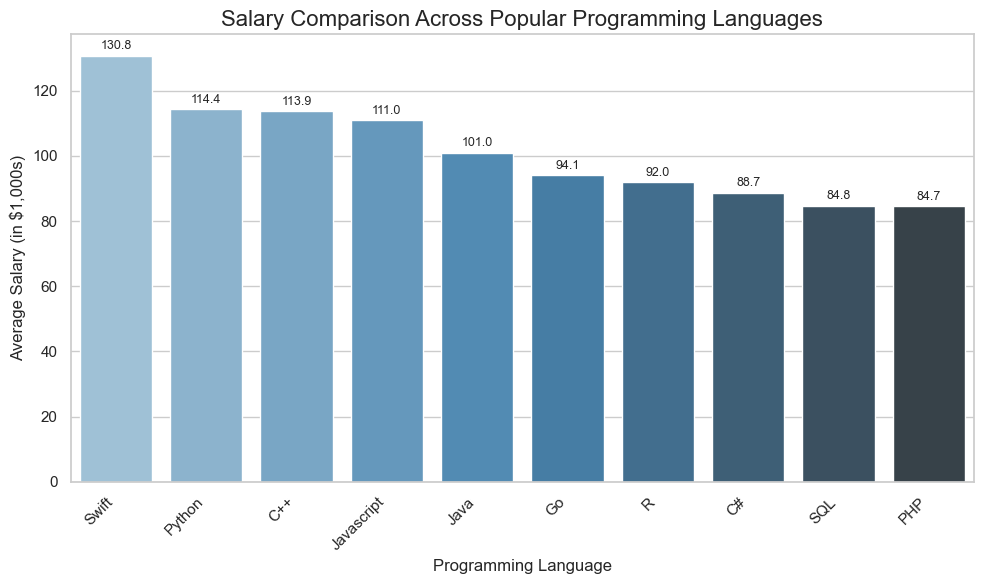

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration du style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# S'assurer que dt est trié par salaire décroissant
dt = dt.sort_values('salaire', ascending=False).reset_index(drop=True)

# Création du bar chart
barplot = sns.barplot(
    x='langage',
    y='salaire',
    data=dt,
    palette='Blues_d'
)

# Titres et étiquettes
plt.title('Salary Comparison Across Popular Programming Languages', fontsize=16)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Average Salary (in $1,000s)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Affichage des valeurs sur les barres
for i in range(len(dt)):
    plt.text(i, dt.loc[i, 'salaire'] + 1, f"{dt.loc[i, 'salaire']:.1f}", 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## Resultat

* les données scrappées sont stockées dans popular-languages.csv
* un graphique compare visuellement les langages les mieux rémunérés